原文代码作者：https://github.com/wzyonggege/statistical-learning-method

# 逻辑斯谛回归

LR是经典的分类方法


回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w_0*x_0 + w_1*x_1 + w_2*x_2 +...+w_n*x_n,(x_0=1)$


In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 创建数据集，采用鸢尾花数据集

In [2]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    # 取前100条数据
    data = np.array(df.iloc[:100, [0,1,-1]])
    return data[:,:2], data[:,-1]

In [3]:
# 加载数据集，并进行数据分割，70%的训练集和30%的测试集
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 逻辑斯蒂回归模型

In [4]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        # 最大迭代次数
        self.max_iter = max_iter
        # 学习率
        self.learning_rate = learning_rate
    
    # sigmoid函数：x>0为1，x<0为0，为逻辑斯蒂回归模型
    def sigmoid(self, x):
        return 1 / (1 + exp(-x))
    
    # 将X里面的每一个数组前面都添加1.0这个元素
    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat

    # 训练函数
    def fit(self, X, y):
        # 向X矩阵的每一列向量都添加第一个元素1.0
        data_mat = self.data_matrix(X)
        # 初始化权重向量
        self.weights = np.zeros((len(data_mat[0]),1), dtype=np.float32)
        
        for iter_ in range(self.max_iter):
            # 对X中的每个向量进行迭代
            for i in range(len(X)):
                # 计算概率
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                # 计算与真实值的误差
                error = y[i] - result
                # 修正权重
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(self.learning_rate, self.max_iter))
    
    # 计算正确率（即ROC值）
    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

## 训练模型并交叉验证

In [5]:
# 训练模型
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [6]:
# 用测试集交叉验证模型
lr_clf.score(X_test, y_test)

1.0

## 绘制数据集，并画出回归模型的边界曲线

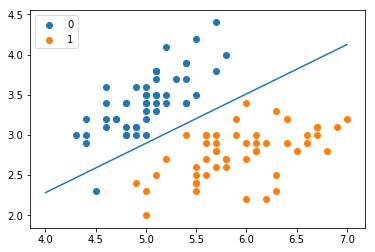

In [7]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

## sklearn

### sklearn.linear_model.LogisticRegression

solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
- a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
- b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# 设置分类器的参数
clf = LogisticRegression(max_iter=200)

In [10]:
# 训练模型
clf.fit(X_train, y_train)

E:\DevSoft\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# 测试集交叉验证
clf.score(X_test, y_test)

1.0

In [12]:
print(clf.coef_, clf.intercept_)

[[ 1.9271587  -3.16719941]] [-0.50966874]


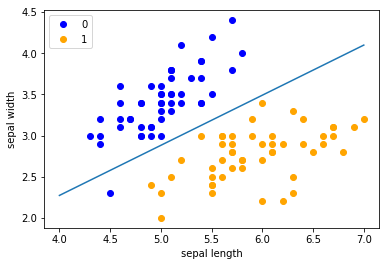

In [13]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()